# 05. Unsupervised machine learning - Clustering
## Notebook content:
    1. Importing libraries and data
    2. Preprocessing
    3. The elbow technique
    4. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans #import the k-means algorithm from scikit-learn.
import pylab as pl #convenience module that bulk imports matplotlib.
sns.set()
from sklearn.preprocessing import StandardScaler #module used to standardise data
from sklearn.decomposition import PCA

In [2]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\bruna\Data Analysis Projects\2023-12 Superstore Sales Analysis'

In [4]:
# Import the sales data
sales_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_clean.pkl'))

In [5]:
sales_clean.shape

(8113, 19)

In [6]:
sales_clean.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656


### 2. Data pre processing

For this analysis we will need to remove categorical variables.
For that, I'll create a new df with the following columns: Sales, Quantity, Discount, Profit. 

I will also need to standardise the data scales. I will do that with PCA.

#### 2.1. Removing categorical variables

In [7]:
sales_clean_numerical = sales_clean.filter(['Sales','Quantity','Discount','Profit'], axis=1)

In [8]:
sales_clean_numerical

,Sales,Quantity,Discount,Profit
0,261.960,2,0.0,41.9136
2,14.620,2,0.0,6.8714
4,22.368,2,0.2,2.5164
5,48.860,7,0.0,14.1694
6,7.280,4,0.0,1.9656
...,...,...,...,...
9988,206.100,5,0.0,55.6470
9989,25.248,3,0.2,4.1028
9990,91.960,2,0.0,15.6332
9991,258.576,2,0.2,19.3932


#### 2.2 Scale data

In [9]:
# Data standardisation

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(sales_clean_numerical)

In [10]:
# Fit standardised data using PCA

pca = PCA()
pca.fit(segmentation_std)

PCA()

In [11]:
# Decide how many features to keep based on the cumulative variance plot

pca.explained_variance_ratio_ #the attribute shows how much variance is 
#explained by each of the 4 individual components

array([0.40516718, 0.26996393, 0.20781588, 0.117053  ])

Text(0, 0.5, 'Cumulative Explained Variance')

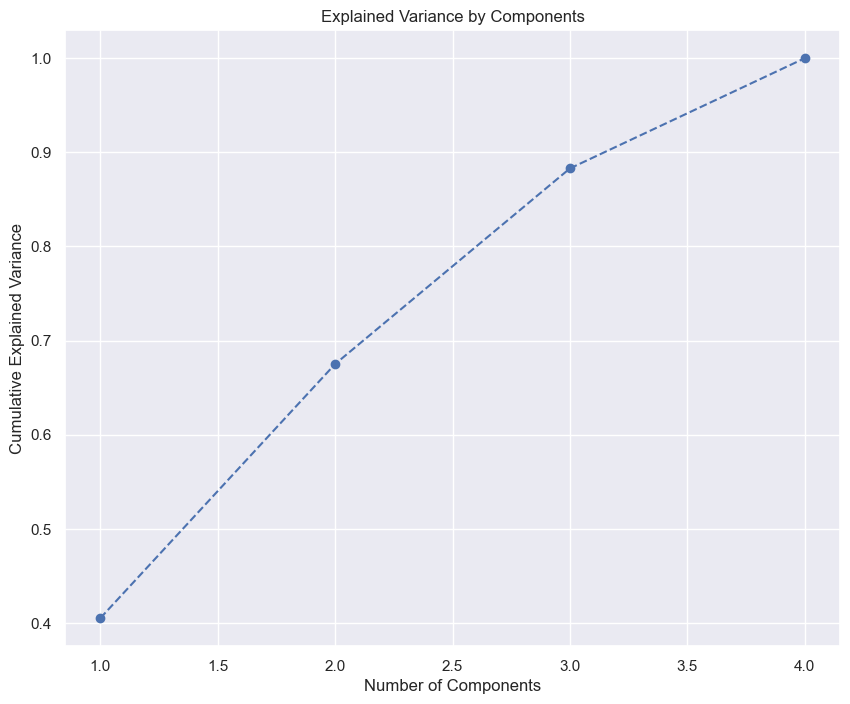

In [12]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

#### 2.3. Perform PCA with chosen number of components

In [27]:
# Keep 3 components

pca = PCA(n_components = 4)

In [28]:
# Fit the model with the 3 chosen components

pca.fit(segmentation_std)

PCA(n_components=4)

In [29]:
# Select only the calculated resulting components scores for the elements in our dataset

pca.transform(segmentation_std)

array([[ 1.73131751, -0.69226326,  1.12292428, -0.47867784],
       [-0.25939119, -1.12048917,  0.00584636,  0.3262969 ],
       [-0.88932095, -0.43698885,  0.26489712, -0.06040722],
       ...,
       [ 0.28399261, -0.97002971,  0.35325576,  0.16026444],
       [ 0.41424405,  0.09707854,  1.31744617, -0.18182881],
       [ 0.31763168, -0.51593844, -0.58854266,  0.25341724]])

In [30]:
scores_pca = pca.transform(segmentation_std)

### 3. The elbow technique

In [31]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [32]:
score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-32452.000000000015,
 -24462.714484644413,
 -18252.257438285604,
 -14457.969008288523,
 -11792.212182569132,
 -10397.202661712468,
 -9455.060951356178,
 -8608.5110886143,
 -7903.765216779467]

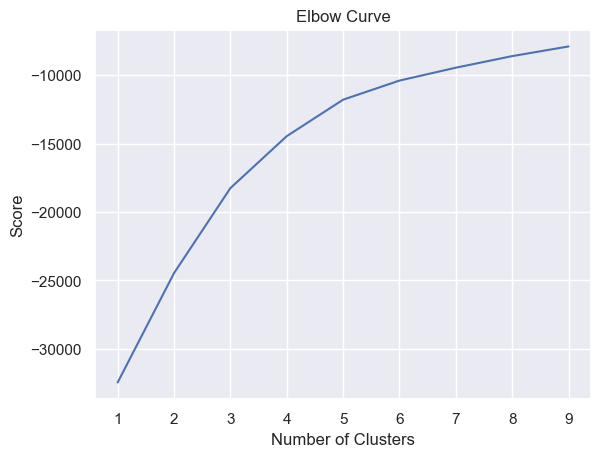

In [33]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  The curve seems to flatten after 5. I'll try a count of clusters of five.

### 3. k-means clustering

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [35]:
# Fit the k-means object to the data.

kmeans.fit(scores_pca)

C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [36]:
# Covert scores_pca from a NumPy array into pandas DataFrame
scores_pca_df = pd.DataFrame(scores_pca, columns=['Sales','Quantity','Discount','Profit'])

# Reset the index and add the 'clusters' column
scores_pca_df['clusters'] = kmeans.fit_predict(scores_pca_df)

C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
scores_pca_df.head()

,Sales,Quantity,Discount,Profit,clusters
0,1.731318,-0.692263,1.122924,-0.478678,2
1,-0.259391,-1.120489,0.005846,0.326297,0
2,-0.889321,-0.436989,0.264897,-0.060407,0
3,0.855869,0.448450,-1.501814,0.481117,1
4,-0.157112,-0.492793,-0.696387,0.645742,0


In [38]:
scores_pca_df['clusters'].value_counts()

clusters
0    4485
1    1533
2    1122
3     711
4     262
Name: count, dtype: int64

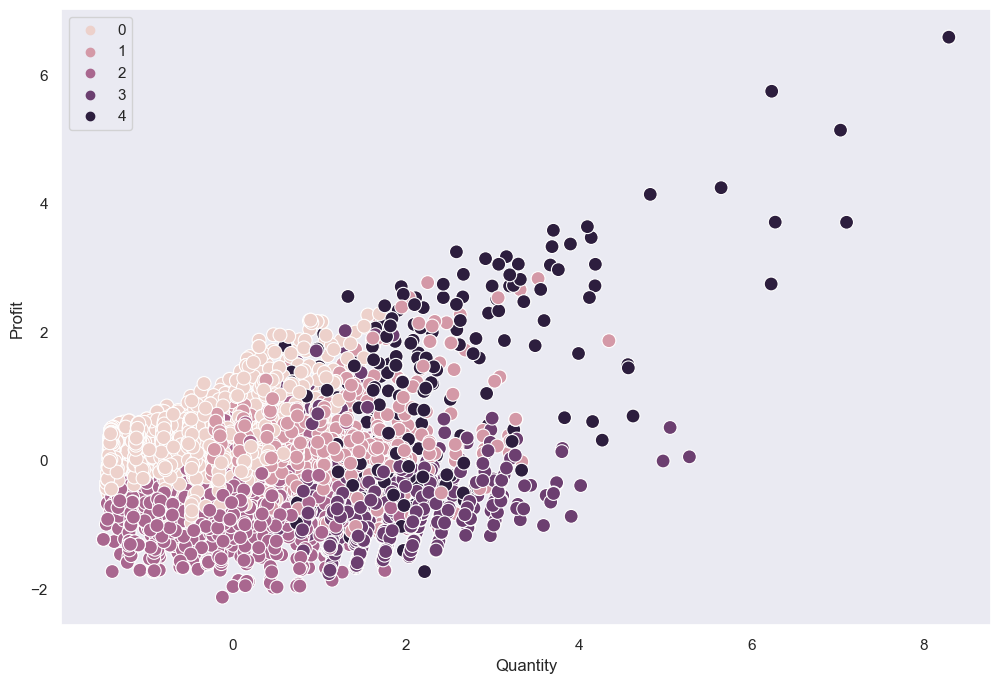

In [41]:
# Plot the clusters for the "Quantity" and "Profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scores_pca_df['Quantity'], y=scores_pca_df['Profit'], hue=kmeans.labels_, s=100) 
# Here, I'm subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points I want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Quantity') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.show()

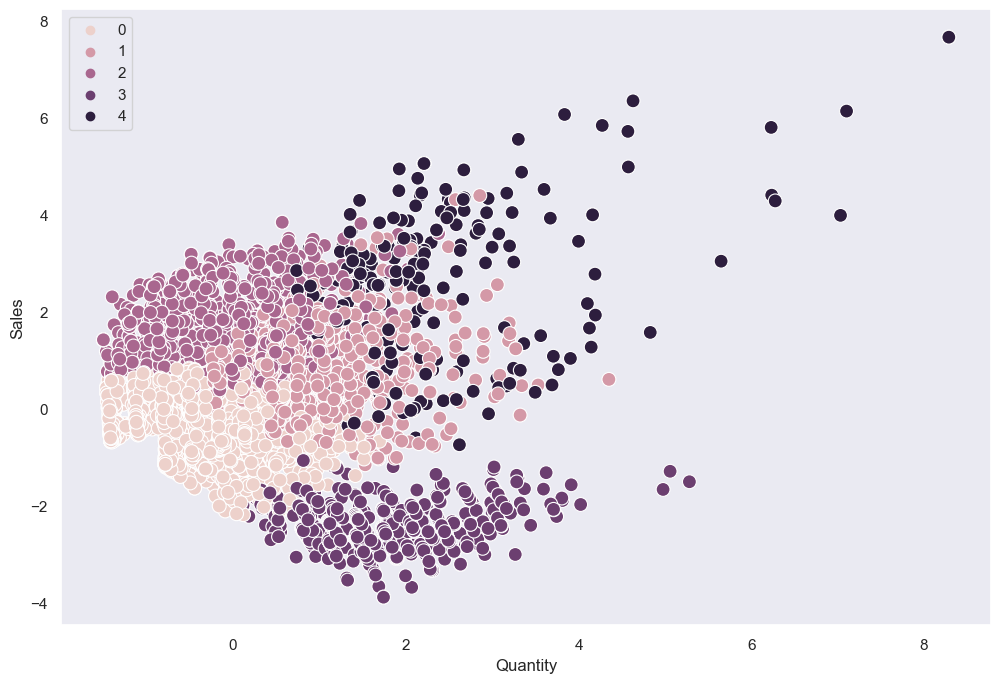

In [57]:
# Plot the clusters for the "Quantity" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scores_pca_df['Quantity'], y=scores_pca_df['Sales'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Quantity') 
plt.ylabel('Sales') 
plt.show()

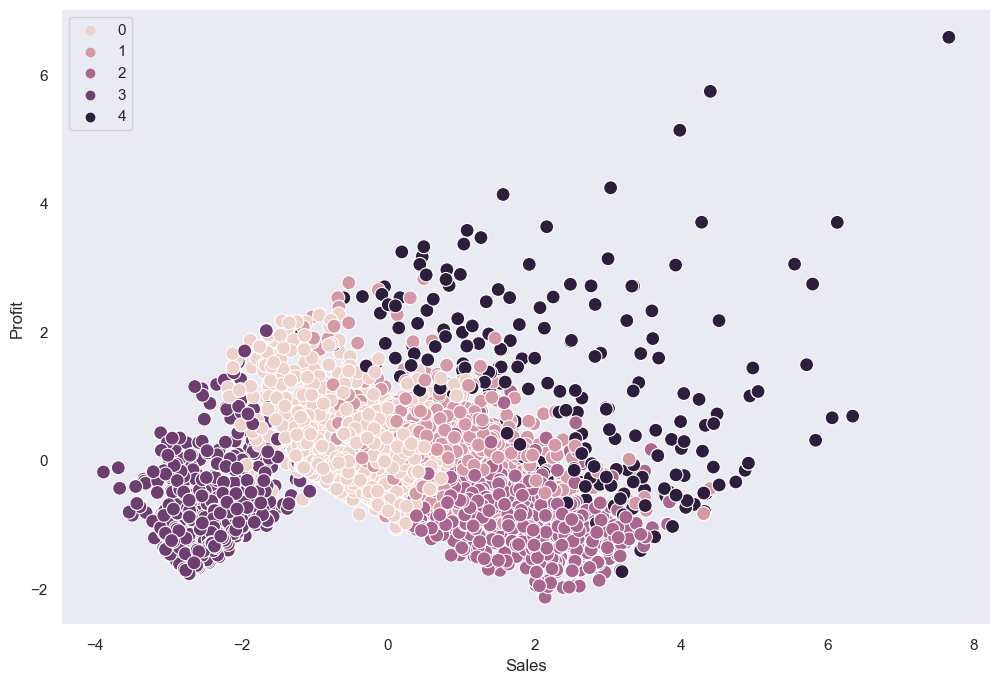

In [58]:
# Plot the clusters for the "Sales" and "Profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scores_pca_df['Sales'], y=scores_pca_df['Profit'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Sales') 
plt.ylabel('Profit') 
plt.show()

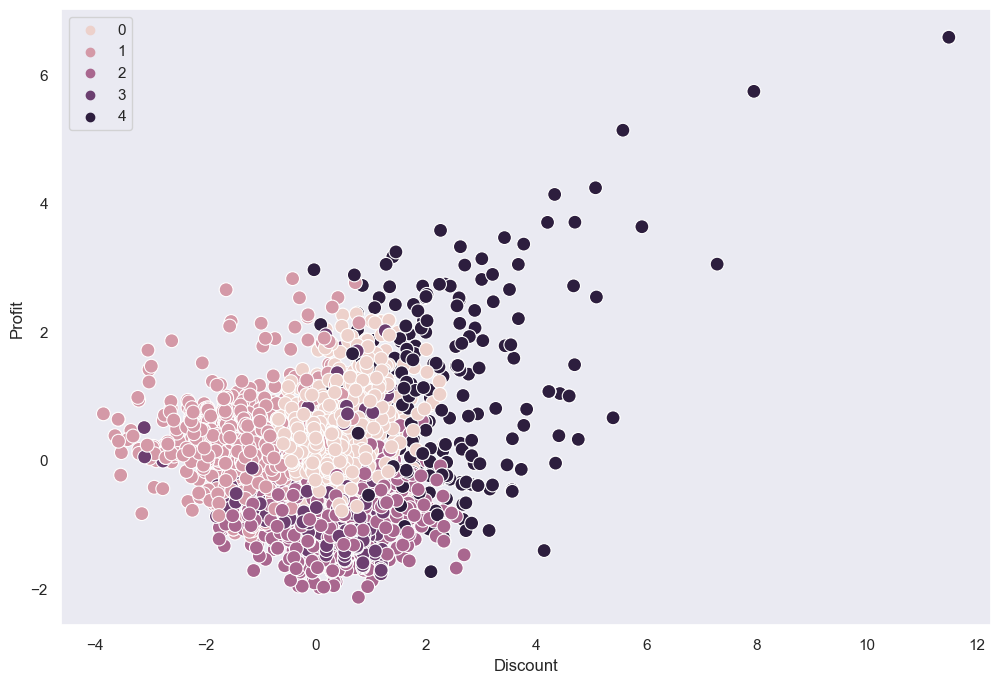

In [42]:
# Plot the clusters for the "Discount" and "Profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scores_pca_df['Discount'], y=scores_pca_df['Profit'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Discount') 
plt.ylabel('Profit') 
plt.show()

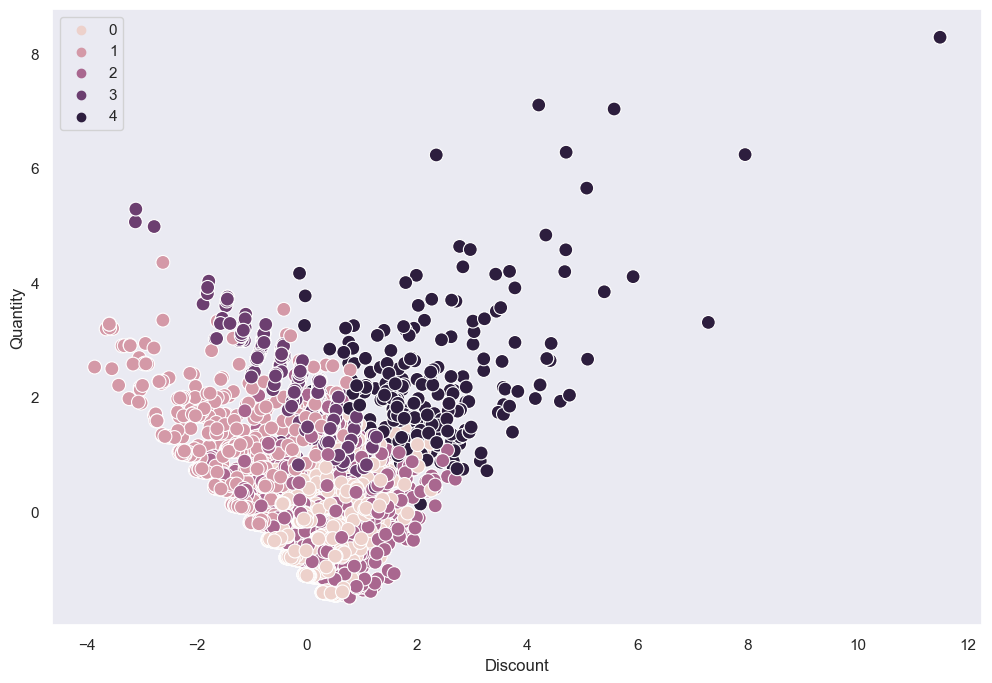

In [45]:
# Plot the clusters for the "Discount" and "Quantity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scores_pca_df['Discount'], y=scores_pca_df['Quantity'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Discount') 
plt.ylabel('Quantity') 
plt.show()

In [54]:
scores_pca_df.loc[scores_pca_df['clusters'] == 4, 'cluster'] = 'dark purple'
scores_pca_df.loc[scores_pca_df['clusters'] == 3, 'cluster'] = 'purple'
scores_pca_df.loc[scores_pca_df['clusters'] == 2, 'cluster'] = 'pink'
scores_pca_df.loc[scores_pca_df['clusters'] == 1, 'cluster'] = 'light pink'
scores_pca_df.loc[scores_pca_df['clusters'] == 0, 'cluster'] = 'beige'

In [56]:
stat_analysis = scores_pca_df.groupby('cluster').agg({'Sales':['mean', 'median'], 
                         'Quantity':['mean', 'median'], 
                         'Discount':['mean', 'median'],
                          'Profit':['mean', 'median']})

# Round the values to 2 decimal places
stat_analysis = stat_analysis.round(2)

stat_analysis

Sales        Quantity        Discount        Profit       
             mean median     mean median     mean median   mean median
cluster                                                               
beige       -0.38  -0.36    -0.57  -0.52     0.11   0.06   0.18   0.16
dark purple  2.47   2.56     2.19   1.92     2.40   2.14   1.03   1.00
light pink   0.58   0.51     0.65   0.47    -1.15  -1.02   0.24   0.21
pink         1.64   1.55    -0.19  -0.26     0.38   0.33  -0.77  -0.77
purple      -2.38  -2.37     1.68   1.49     0.28   0.43  -0.82  -0.96

Judging by these statistics:

- The dark purple cluster has the highest stats in almost all categories: higher quantities and higher discounts, with higher sales and also higher profit

- Quantity is not a predictor of sales or profit. Purple has the second highest quantity, but the lowest sales and lowest profit. This makes sense due to variability of prices - items can be sold in big quantities but be low on price and have a low profit margin.

- Discount is not a predictor of quantity. Groups with high discounts don't necessarily have higher quantities, neither low discounts are indicative of low quantity purchased. On a further analysis it would be interesting to see higher discounts are mostly applied to more expensive items (derive column for item price based on sales and quantity; calculate original price by removing discount)